In [57]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cwd=os.getcwd()

In [2]:
# titanic = pd.read_csv('titanic.csv')
titanic = pd.read_csv(cwd+'/train.csv', index_col=0)
# titanic.isna().sum()
# titanic.dropna()
titanic=titanic.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
# sibsp : nb de frères/soeurs ou époux(se)
# parch : nb of parents / children aboard the Titanic
titanic=titanic.fillna(titanic.Age.mean())
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,male,22.000000,1,0,S
2,1,1,female,38.000000,1,0,C
3,1,3,female,26.000000,0,0,S
4,1,1,female,35.000000,1,0,S
5,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,S
888,1,1,female,19.000000,0,0,S
889,0,3,female,29.699118,1,2,S


In [3]:
# titanic.shape #  1309 rows x 6 columns
# titanic.info()
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


<AxesSubplot:ylabel='Frequency'>

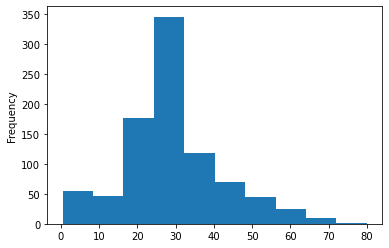

In [4]:
titanic.Age.plot.hist()

In [5]:
titanic.describe(include=['O'])

,Sex,Embarked
count,891,891
unique,2,4
top,male,S
freq,577,644


In [6]:
# titanic.Survived.unique()
titanic.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [7]:
# titanic['sibsp'].value_counts()
# titanic['parch'].value_counts()
# titanic['Sex'].value_counts(normalize=True)
titanic['Pclass'].value_counts(normalize=True)
# titanic['Survived'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [8]:
# pd.crosstab(titanic['Survived'], titanic['Sex'], normalize=True, margins=True) * 100 
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=True, margins=True).T * 100

Pclass,1,2,3,All
Survived,,,,
0,8.978676,10.886644,41.750842,61.616162
1,15.263749,9.764310,13.355780,38.383838
All,24.242424,20.650954,55.106622,100.000000


# Modèle de ML

In [9]:
titanic['Sex'].replace(['male','female'],[0, 1], inplace=True)
titanic['Embarked'].replace(['C','Q','S'],[0, 1, 2], inplace=True)

In [10]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le
# le.fit(titanic.Embarked)
# le.classes_
# titanic['Embarked_']=le.transform(titanic.Embarked)
# titanic

In [11]:
titanic.dtypes 

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Embarked    float64
dtype: object

In [12]:
# for col in titanic.columns : 
#     if titanic[col].dtypes == 'object' : 
#         print(col)
#         le = LabelEncoder()
#         titanic[col] = le.fit_transform(titanic[col])

In [13]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,0,22.000000,1,0,2.0
2,1,1,1,38.000000,1,0,0.0
3,1,3,1,26.000000,0,0,2.0
4,1,1,1,35.000000,1,0,2.0
5,0,3,0,35.000000,0,0,2.0
...,...,...,...,...,...,...,...
887,0,2,0,27.000000,0,0,2.0
888,1,1,1,19.000000,0,0,2.0
889,0,3,1,29.699118,1,2,2.0


In [14]:
# titanic.Pclass.value_counts()

In [15]:
# Pop générale : Répartition 'survived'
titanic.Survived.value_counts(normalize=True)
# died        0.591778
# survived    0.408222

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [16]:
X = titanic.drop('Survived', 1)
# X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch']]
y = titanic['Survived']
X #  dataframe
# y #  Series

C:\Users\pc\AppData\Local\Temp/ipykernel_7644/2567244747.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = titanic.drop('Survived', 1)


,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,0,22.000000,1,0,2.0
2,1,1,38.000000,1,0,0.0
3,3,1,26.000000,0,0,2.0
4,1,1,35.000000,1,0,2.0
5,3,0,35.000000,0,0,2.0
...,...,...,...,...,...,...
887,2,0,27.000000,0,0,2.0
888,1,1,19.000000,0,0,2.0
889,3,1,29.699118,1,2,2.0


Répartition de survived (**pop générale**) 

In [17]:
# titanic.survived.value_counts(normalize=True)

In [18]:
# Répartition de survived (**sans** `stratification`) à travers les deux échantillons `train` et `test`
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X, y)

In [19]:
y_test_sf

PassengerId
712    0
407    0
58     0
504    0
253    0
      ..
732    0
10     1
887    0
320    1
236    0
Name: Survived, Length: 223, dtype: int64

In [20]:
y_train_sf.value_counts(normalize=True)

0    0.601796
1    0.398204
Name: Survived, dtype: float64

In [21]:
y_test_sf.value_counts(normalize=True)

0    0.659193
1    0.340807
Name: Survived, dtype: float64

In [22]:
# Répartition de survived (**avec** `stratification`) à travers les deux échantillons `train` et `test`
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [23]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
487,1,1,35.000000,1,0,2.0
239,2,0,19.000000,0,0,2.0
723,2,0,34.000000,0,0,2.0
185,3,1,4.000000,0,2,2.0
57,2,1,21.000000,0,0,2.0
...,...,...,...,...,...,...
548,2,0,29.699118,0,0,0.0
470,3,1,0.750000,2,1,0.0
737,3,1,48.000000,1,3,2.0


In [24]:
y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [25]:
y_test.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

# Construction de l'arbre 

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [27]:
# 1è bug rencontré : could not convert string to float
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# tree.classes_
# print(tree.max_depth)
# tree.criterion

y_pred = tree.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [29]:
y_test.values

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(y_test, y_pred)
# mat_conf
acc = mat_conf.diagonal().sum()/mat_conf.sum()
acc

0.7309417040358744

In [31]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc
# score = tree.score(X_test, y_test)
# score

0.7309417040358744

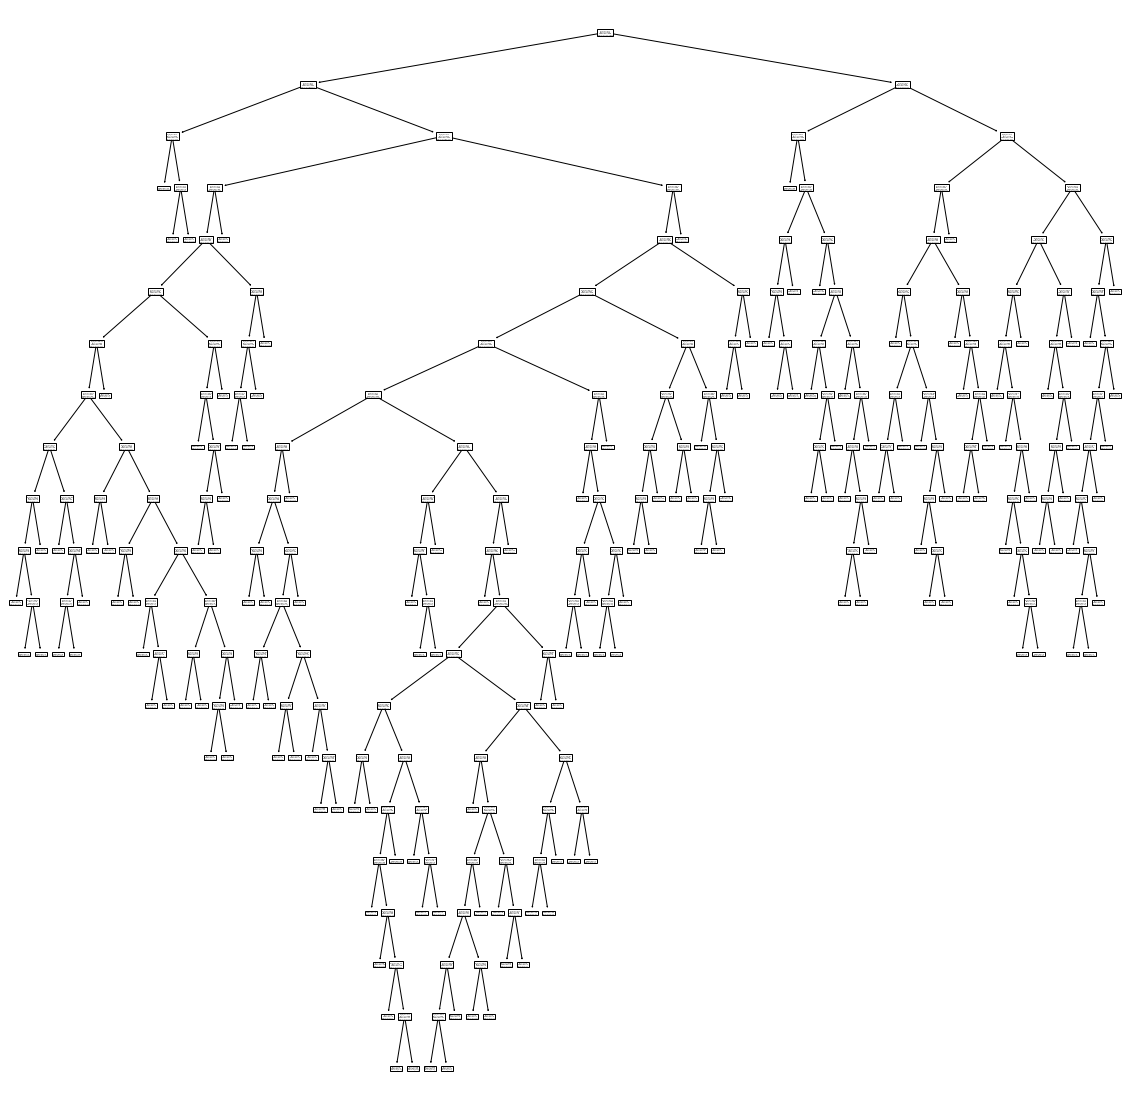

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree_titanic = plot_tree(tree)
# L'arbre est trop grand (illisible) => Overfittng

In [33]:
# # Si vous êtes sur une version antérieure de sklearn, voici le code qui marche :
# # Rq : Vous avez besoin d'installer le logiciel (Graphviz) et de rajouter les variables d'environnement.

# import six
# import sys
# sys.modules['sklearn.externals.six'] = six
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
# import pydotplus
# treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
# treeG.fit(Xr_train,Yb_train)
# dot_data = StringIO()
# export_graphviz(treeG, out_file=dot_data)
# graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png("treeOpt.png")
# from IPython.display import Image
# Image(filename='treeOpt.png')

In [34]:
from sklearn.tree import export_text
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

# Q : Cmnt extraire les régles à partir d'un arbre sous la forme d'un DataFrame :
# R :
# https://stackoverflow.com/questions/56334210/how-to-extract-sklearn-decision-tree-rules-to-pandas-boolean-conditions

|--- Sex <= 0.50
|   |--- Age <= 3.50
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- class: 1
|   |--- Age >  3.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- Age <= 53.00
|   |   |   |   |   |--- Age <= 47.50
|   |   |   |   |   |   |--- Age <= 45.25
|   |   |   |   |   |   |   |--- Age <= 31.50
|   |   |   |   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |   |   |   |--- Age <= 25.00
|   |   |   |   |   |   |   |   |   |   |--- Parch <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Parch >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Age >  25.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Age >  27.50
|   |

In [35]:
#####       		Optimisation de la profondeur de l'arbre		#####

scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    score=tree.score(X_test, y_test)
    scores.append(score)

In [36]:
# # A l'aide d'un gridsearch => plusieurs params à la fois

# from sklearn.model_selection import GridSearchCV
# param = [{"max_depth" : list(range(2, 10))}]
# grid =  GridSearchCV(DecisionTreeClassifier(), param, cv = 10, n_jobs = -1)
# grid = grid.fit(X_train, y_train)
# # paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - grid.best_score_, treeOpt.best_params_))


In [37]:
scores

[0.757847533632287,
 0.8071748878923767,
 0.7533632286995515,
 0.7802690582959642,
 0.7757847533632287,
 0.7668161434977578,
 0.7399103139013453,
 0.7488789237668162]

In [38]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
487,1,1,35.0,1,0,2.0
239,2,0,19.0,0,0,2.0


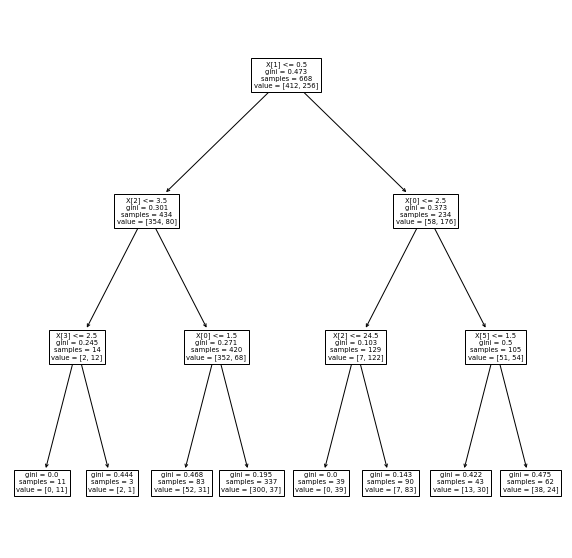

In [39]:
# Algo optimal pr les besoins du plot de l'arbre
tree=DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize = (10, 10))
tree_titanic = plot_tree(tree)

In [40]:
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

|--- Sex <= 0.50
|   |--- Age <= 3.50
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- class: 0
|   |--- Age >  3.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- Pclass >  1.50
|   |   |   |--- class: 0
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 24.50
|   |   |   |--- class: 1
|   |   |--- Age >  24.50
|   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Embarked <= 1.50
|   |   |   |--- class: 1
|   |   |--- Embarked >  1.50
|   |   |   |--- class: 0



In [41]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [45]:
# rf.criterion
# print(rf.max_depth)
rf.n_estimators # 100 decision tree since version 0.22
rf.predict


<bound method ForestClassifier.predict of RandomForestClassifier(n_jobs=-1, random_state=42)>

In [47]:
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [48]:
y_test

PassengerId
158    0
502    0
353    0
83     1
684    0
      ..
260    1
92     0
342    1
116    0
640    0
Name: Survived, Length: 223, dtype: int64

In [50]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat
pd.DataFrame(conf_mat) #, columns=iris.target_names, index=iris.target_names)

,0,1
0,110,27
1,29,57


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

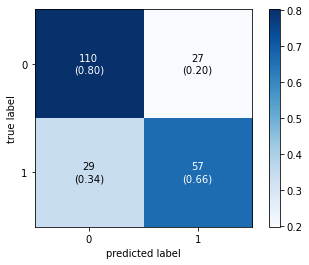

In [52]:
plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)
# class_names=iris.target_names

In [53]:
# metrics.accuracy_score(y_test, y_pred)
(1 - metrics.accuracy_score(y_test, y_pred)) * 100

25.11210762331838

In [54]:
(1 - rf.score(X_test, y_test)) * 100

25.11210762331838

# Tuning : n_estimators, max_features, max_depth, ... 

In [58]:
# max_depths ? 
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

In [62]:
errors = []
err_default = 25.11
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=42)
    rf.fit(X_train, y_train)
    err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')



Results : max_depth = 1 => err_test = 22.422

Improvement of 2.687999999999999%




Results : max_depth = 2 => err_test = 19.731

Improvement of 5.378999999999998%




Results : max_depth = 3 => err_test = 18.834

Improvement of 6.276%




Results : max_depth = 4 => err_test = 19.731

Improvement of 5.378999999999998%




Results : max_depth = 5 => err_test = 22.422

Improvement of 2.687999999999999%




Results : max_depth = 6 => err_test = 22.422

Improvement of 2.687999999999999%




Results : max_depth = 7 => err_test = 21.076

Improvement of 4.033999999999999%




Results : max_depth = 8 => err_test = 23.318

Improvement of 1.791999999999998%




Results : max_depth = 9 => err_test = 23.318

Improvement of 1.791999999999998%




Results : max_depth = 10 => err_test = 23.767

Improvement of 1.343%




Results : max_depth = None => err_test = 25.112

Improvement of -0.0019999999999988916%




Text(0.5, 0, 'max_depths')

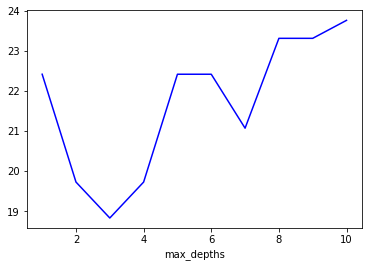

In [63]:
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

## n_estimators (nb d'arbre) 

In [61]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
n_estimators

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  77,  82,  87,  92,  97, 102, 107, 112, 117, 122, 127,
       132, 137, 142, 147, 153, 158, 163, 168, 173, 178, 183, 188, 193,
       198, 203, 208, 213, 218, 223, 229, 234, 239, 244, 249, 254, 259,
       264, 269, 274, 279, 284, 289, 294, 300])

In [64]:
errors = []
for estimator in n_estimators :
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
   errors.append(err)
   print(f"\n\nResults : n_estimators = {rf.n_estimators} => err_test = {err}\n\n")
   print('Improvement of {:0.2f}%.'.format(err_default - err))



Results : n_estimators = 1 => err_test = 29.148


Improvement of -4.04%.


Results : n_estimators = 6 => err_test = 27.354


Improvement of -2.24%.


Results : n_estimators = 11 => err_test = 26.906


Improvement of -1.80%.


Results : n_estimators = 16 => err_test = 25.112


Improvement of -0.00%.


Results : n_estimators = 21 => err_test = 26.906


Improvement of -1.80%.


Results : n_estimators = 26 => err_test = 26.457


Improvement of -1.35%.


Results : n_estimators = 31 => err_test = 26.009


Improvement of -0.90%.


Results : n_estimators = 36 => err_test = 25.561


Improvement of -0.45%.


Results : n_estimators = 41 => err_test = 26.906


Improvement of -1.80%.


Results : n_estimators = 46 => err_test = 26.906


Improvement of -1.80%.


Results : n_estimators = 51 => err_test = 26.906


Improvement of -1.80%.


Results : n_estimators = 56 => err_test = 26.906


Improvement of -1.80%.


Results : n_estimators = 61 => err_test = 26.457


Improvement of -1.35%.


Results : n_

Text(0, 0.5, 'err_test')

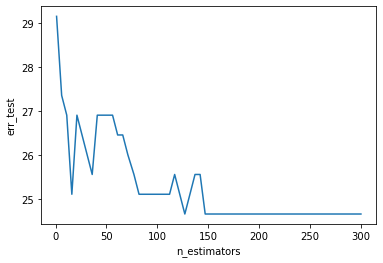

In [65]:
plt.plot(n_estimators, errors, label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('err_test')

In [66]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
errors = []
errors_test, errors_train, accuracy_oob = [], [], []
for estimator in n_estimators :
    rf = RandomForestClassifier(n_estimators=estimator, oob_score = True, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    err_test = round((1.0 - metrics.accuracy_score(y_test, y_pred)) * 100, 3)
    errors_test.append(err_test)
    train_pred = rf.predict(X_train)
    err_train = round((1.0 - metrics.accuracy_score(y_train, train_pred)) * 100, 3)
    errors_train.append(err_train)
    acc_oob = round(rf.oob_score_ * 100, 3)
    accuracy_oob.append(acc_oob)
    print(f"\n\nResults : n_estimators = {rf.n_estimators} => acc_oob = {acc_oob}, err_test = {err_test}, err_train = {err_train}\n\n")

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anacond



Results : n_estimators = 1 => acc_oob = 67.964, err_test = 29.148, err_train = 10.928




Results : n_estimators = 6 => acc_oob = 77.096, err_test = 26.906, err_train = 7.335




Results : n_estimators = 11 => acc_oob = 77.395, err_test = 24.664, err_train = 6.737




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(




Results : n_estimators = 16 => acc_oob = 79.341, err_test = 22.87, err_train = 6.886




Results : n_estimators = 21 => acc_oob = 80.09, err_test = 24.215, err_train = 6.287




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 26 => acc_oob = 81.437, err_test = 23.767, err_train = 6.287




Results : n_estimators = 31 => acc_oob = 79.491, err_test = 25.112, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 36 => acc_oob = 80.09, err_test = 25.112, err_train = 6.138




Results : n_estimators = 41 => acc_oob = 79.94, err_test = 25.561, err_train = 6.287




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 46 => acc_oob = 80.838, err_test = 24.215, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 51 => acc_oob = 80.838, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 56 => acc_oob = 79.042, err_test = 25.112, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 61 => acc_oob = 81.138, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 66 => acc_oob = 79.79, err_test = 26.009, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 71 => acc_oob = 80.689, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 77 => acc_oob = 79.79, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 82 => acc_oob = 80.539, err_test = 23.767, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 87 => acc_oob = 80.539, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 92 => acc_oob = 80.539, err_test = 23.318, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 97 => acc_oob = 80.389, err_test = 25.112, err_train = 6.287




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 102 => acc_oob = 80.838, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 107 => acc_oob = 80.389, err_test = 25.561, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 112 => acc_oob = 81.138, err_test = 25.112, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 117 => acc_oob = 81.287, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 122 => acc_oob = 80.24, err_test = 25.561, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 127 => acc_oob = 80.389, err_test = 25.112, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 132 => acc_oob = 80.539, err_test = 24.215, err_train = 6.287




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 137 => acc_oob = 81.138, err_test = 25.112, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 142 => acc_oob = 80.539, err_test = 25.561, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 147 => acc_oob = 80.988, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 153 => acc_oob = 80.09, err_test = 24.215, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 158 => acc_oob = 80.838, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 163 => acc_oob = 80.389, err_test = 23.767, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 168 => acc_oob = 80.838, err_test = 25.112, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 173 => acc_oob = 80.24, err_test = 23.767, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 178 => acc_oob = 81.138, err_test = 25.112, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 183 => acc_oob = 80.838, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 188 => acc_oob = 80.838, err_test = 25.561, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 193 => acc_oob = 79.94, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 198 => acc_oob = 80.689, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 203 => acc_oob = 80.838, err_test = 24.215, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 208 => acc_oob = 80.539, err_test = 25.561, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 213 => acc_oob = 80.689, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 218 => acc_oob = 80.689, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 223 => acc_oob = 80.24, err_test = 25.112, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 229 => acc_oob = 80.838, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 234 => acc_oob = 81.138, err_test = 25.112, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 239 => acc_oob = 81.437, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 244 => acc_oob = 80.689, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 249 => acc_oob = 80.689, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 254 => acc_oob = 80.539, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 259 => acc_oob = 80.689, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 264 => acc_oob = 80.539, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 269 => acc_oob = 81.287, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 274 => acc_oob = 82.036, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 279 => acc_oob = 81.437, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 284 => acc_oob = 80.838, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 289 => acc_oob = 81.587, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 294 => acc_oob = 80.09, err_test = 24.664, err_train = 6.138




C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Results : n_estimators = 300 => acc_oob = 81.737, err_test = 24.664, err_train = 6.138




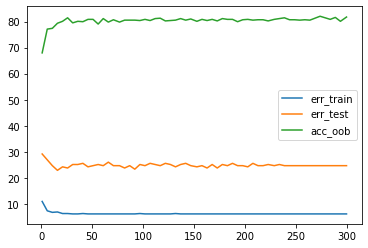

In [67]:
plt.plot(n_estimators, errors_train, label = 'err_train')
plt.plot(n_estimators, errors_test, label = 'err_test')
plt.plot(n_estimators, accuracy_oob, label = 'acc_oob')
plt.legend()

In [68]:
1-rf.oob_score_

0.1826347305389222

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param = { "max_features" : list(range(2, 5, 1)) }
param

{'max_features': [2, 3, 4]}

In [71]:
rf = GridSearchCV(RandomForestClassifier(n_estimators=250, random_state = 0),
			        param, cv=5, n_jobs = -1)
rf
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250, random_state=0),
             n_jobs=-1, param_grid={'max_features': [2, 3, 4]})

In [72]:
pd.DataFrame(rf.cv_results_)[['param_max_features', 'mean_test_score', 'params']]
# rf.best_estimator_

,param_max_features,mean_test_score,params
0,2,0.796420,{'max_features': 2}
1,3,0.794916,{'max_features': 3}
2,4,0.797924,{'max_features': 4}


In [73]:
1-rf.score(X_test, y_test)

0.22869955156950672

In [80]:
# Créer 1df qui contient les features et leur importance
feature = [column for column in X.columns]
importance = np.round(rf.best_estimator_.feature_importances_ * 100, 2)
feature_importance = pd.DataFrame({'feature' : feature, 'importance' : importance})
feature_importance
# feature

,feature,importance
0,Pclass,13.50
1,Sex,33.83
2,Age,36.09
3,SibSp,7.33
4,Parch,4.69
5,Embarked,4.56


In [84]:
feature_importances = rf.best_estimator_.feature_importances_
pd.DataFrame({'feature' : X.columns, 'importance' : feature_importances}).sort_values('importance', ascending=False)

,feature,importance
2,Age,0.360874
1,Sex,0.338267
0,Pclass,0.135000
3,SibSp,0.073314
4,Parch,0.046904
5,Embarked,0.045639


In [85]:
rf.best_estimator_.feature_importances_

array([0.13500047, 0.33826734, 0.36087431, 0.07331447, 0.04690412,
       0.04563929])